In [2]:
import numpy as np

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from umap import UMAP

import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
def read_data(filename: str, delimeter=';'):
    with open(filename, mode="r", newline='') as f:
        features = list()
        targets = list()
        for row in f:
            line = list()
            for s in row.split(delimeter):
                s = s.strip()
                if s:
                    line.append(s)
            features.append(list(map(float ,line[1:-1])))
            targets.append(int(line[-1]))
    return features, targets

In [4]:
def plot_embeddings(embedded_tsne, embedded_umap, targets, names):
    labels = list(range(np.max(targets)+1))
    palette = np.array(sns.color_palette(n_colors=len(labels)))

    patchs = []
    for i, color in enumerate(palette):
        patchs.append(mpatches.Patch(color=color, label=names[i-1]))


    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.scatter(embedded_tsne[:,0], embedded_tsne[:,1], c=palette[targets])
    plt.legend(handles=patchs, loc='upper right')
    plt.title("Визуализация в t-SNE")

    plt.subplot(2, 1, 2)
    plt.scatter(embedded_umap[:,0], embedded_umap[:,1], c=palette[targets])
    plt.legend(handles=patchs, loc='upper right')
    plt.title("Визуализация в UMAP")

    plt.show()

In [5]:
features, targets = read_data('glass.data', delimeter=',')
np.array(features)

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [6]:
names = (
    'building_windows_float_processed',
    'building_windows_non_float_processed',
    'vehicle_windows_float_processed',
    'vehicle_windows_non_float_processed',
    'containers',
    'tableware',
    'headlamps'
)

In [7]:
embedded_tsne = TSNE().fit_transform(np.array(features))
embedded_umap = UMAP().fit_transform(features)

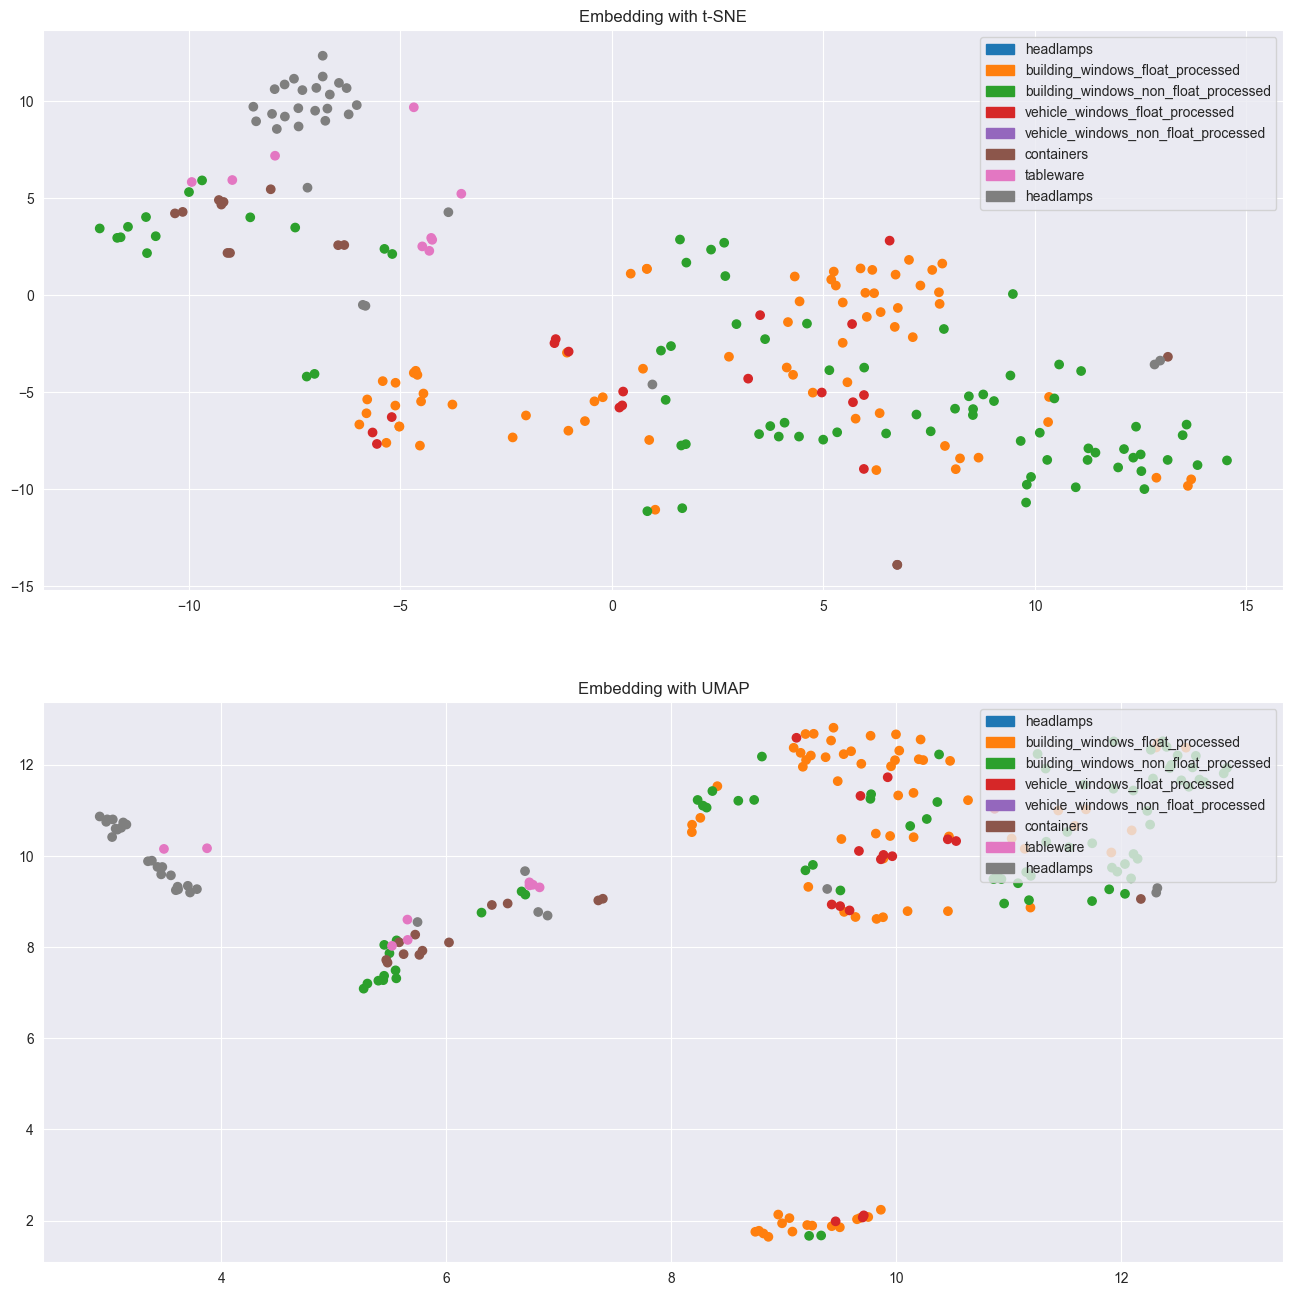

In [8]:
plot_embeddings(embedded_tsne, embedded_umap, targets, names)

In [9]:
min_max_scaled_tsne = TSNE().fit_transform(MinMaxScaler().fit_transform(features))
min_max_scaled_umap = UMAP().fit_transform(MinMaxScaler().fit_transform(features))

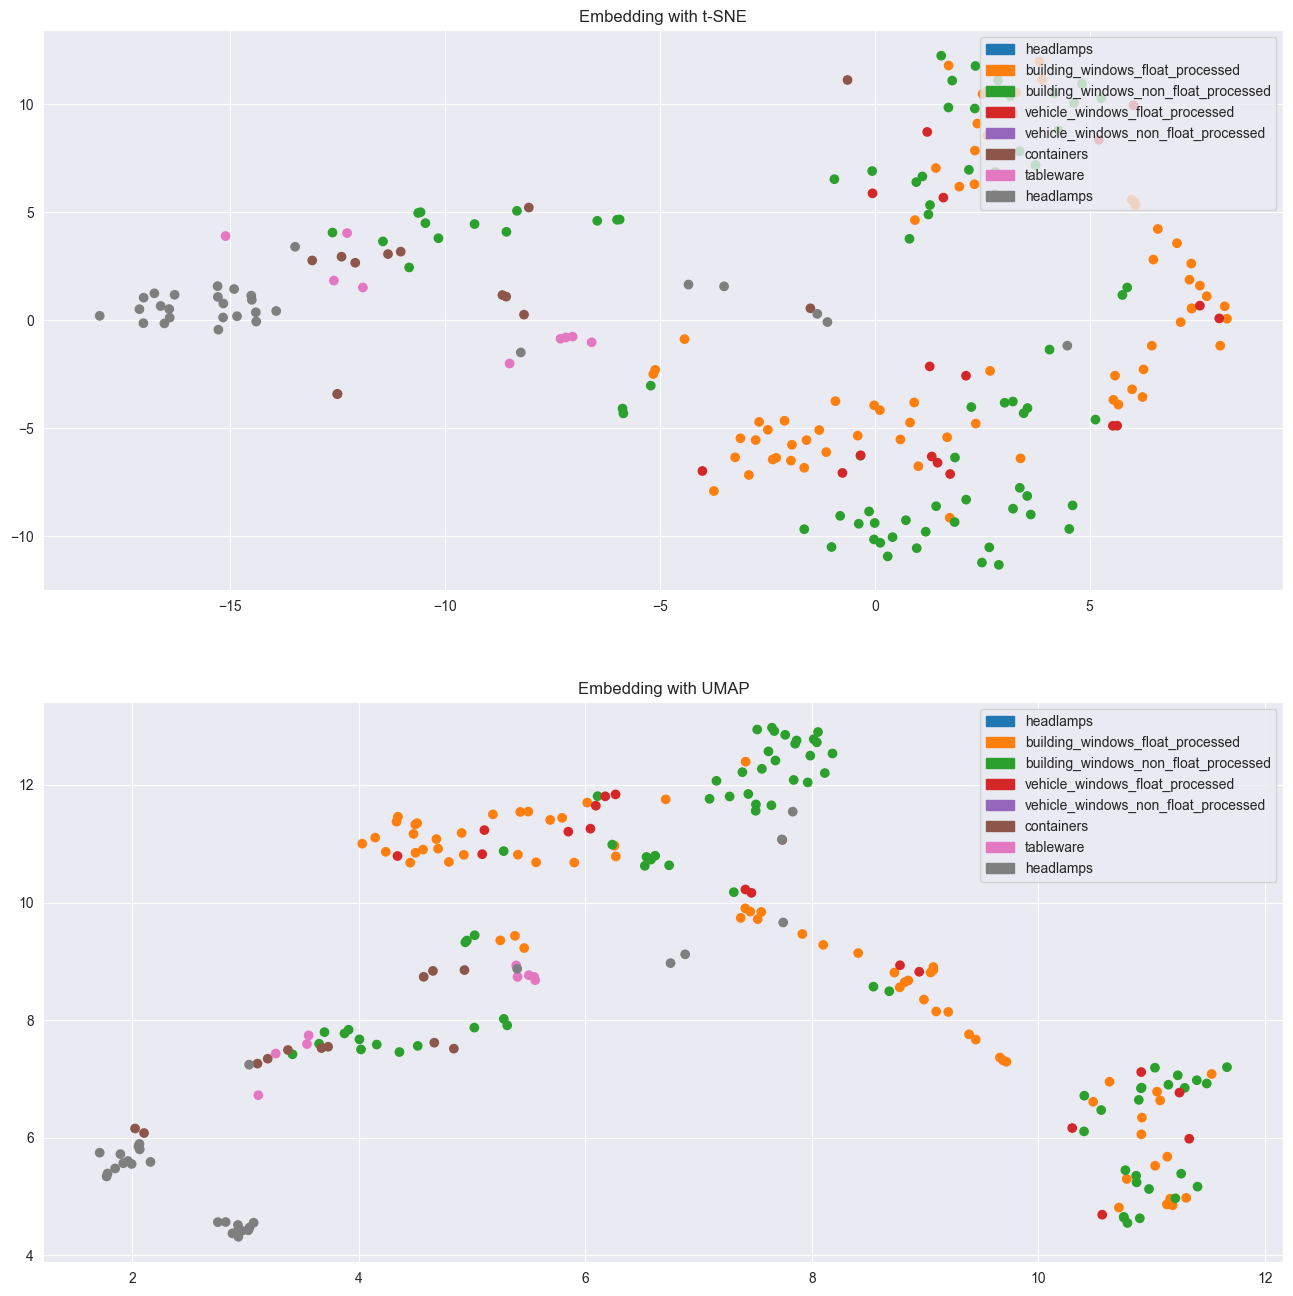

In [24]:
plot_embeddings(min_max_scaled_tsne, min_max_scaled_umap, targets, names)
# MinMax

In [11]:
standard_scaled_tsne = TSNE().fit_transform(StandardScaler().fit_transform(features))
standard_scaled_umap = UMAP().fit_transform(StandardScaler().fit_transform(features))

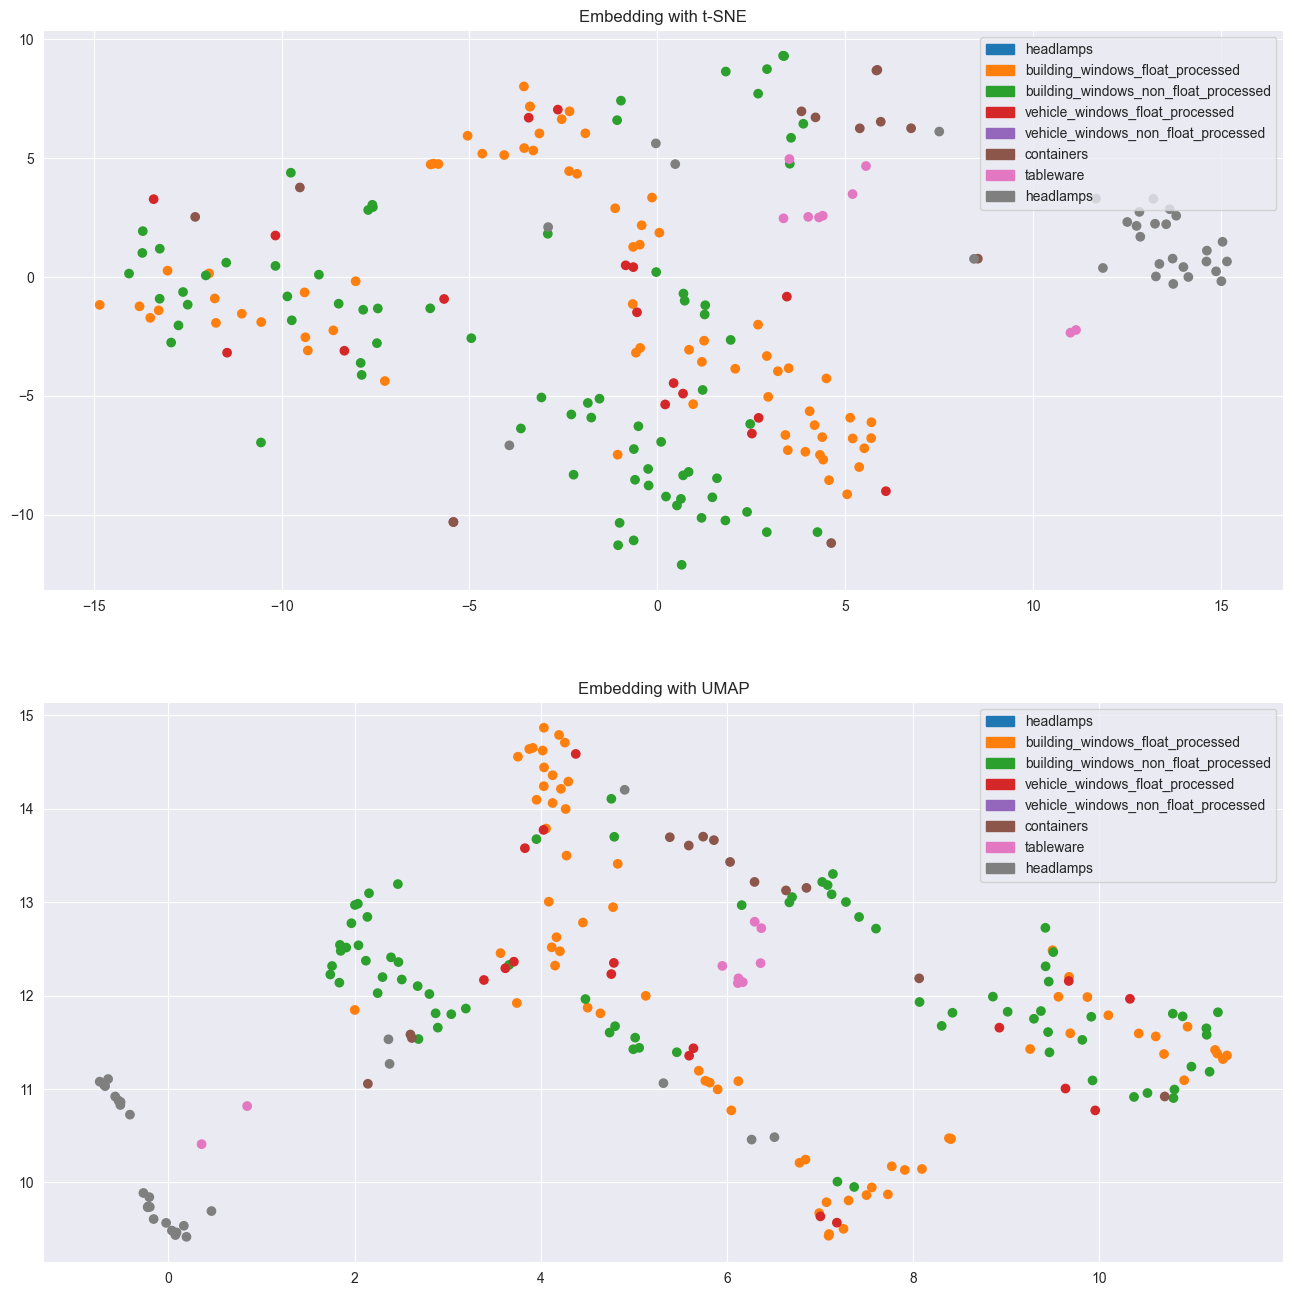

In [18]:
plot_embeddings(standard_scaled_tsne, standard_scaled_umap, targets, names)
# Standard

In [19]:
robust_scaled_tsne = TSNE().fit_transform(RobustScaler().fit_transform(features))
robust_scaled_umap = UMAP().fit_transform(RobustScaler().fit_transform(features))

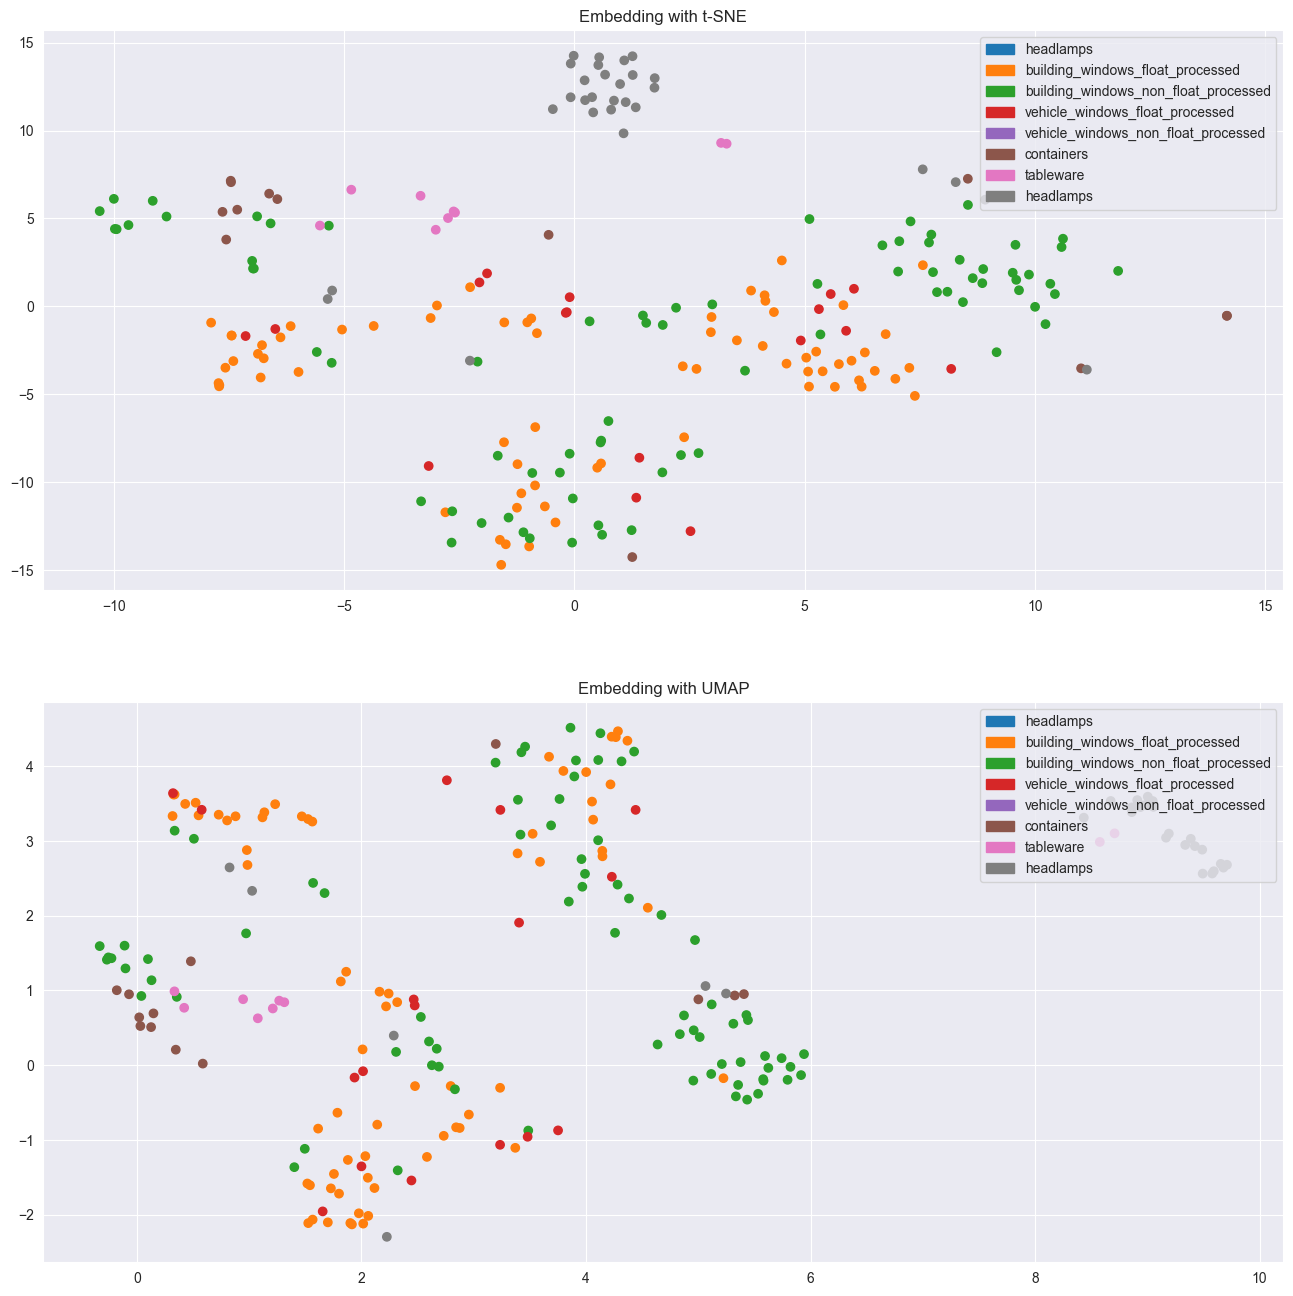

In [20]:
plot_embeddings(robust_scaled_tsne, robust_scaled_umap, targets, names)
# Robust